# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [1]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 25 minutes]
---

### Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

### 1.1) Write a function to compute the z-scores for single check of amount `check_amt`.

In [ ]:
# Replace `pass` with appropriate code



def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    if z = 
    
    
    pass



### 1.2) Use your function to compute the z-score for a 24 dollar check, and interpret the result using the empirical rule. 

In [18]:
# Code here 
import scipy.stats as stats
from math import sqrt

mu = 20
sigma = 2
n = 1
x_bar = 24
z = (x_bar - mu)/(sigma/sqrt(n))
z

print(stats.norm.cdf(z))


0.9772498680518208


In [ ]:
"""
There is a 97.7% likelyhood that sample mean lie
"""

### 1.3) Using $\alpha = 0.05$, is the 24 dollar check significantly _greater_ than the mean? How do you know this?  

For reference, here is a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [ ]:
# Code here 



In [ ]:
"""
Written answer here

Ho: dollar check = mean 
Ha: dollar check > mean 
One Sample T-test (one tailed qith q= .95)
"""

### Confidence Intervals and the Central Limit Theorem

### 1.4) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [39]:
# Code here 
sample_mean = 24 
sigma = 2
n= 100
moe = z*(sigma/sqrt(n))
z = 1.96 # z critical value of 2 standard deviations away from the mean
#stats.norm.ppf(q, loc=0, scale=1)
confidence_int_upper = sample_mean + moe
confidence_int_lower = sample_mean - moe
print(confidence_int_upper)
print(confidence_int_lower)

24.392
23.608


In [ ]:
"""
Written answer here


"""

### 1.5) Imagine that we didn't know how the population of check totals was distributed. How would _sampling_ and the _Central Limit Theorem_ allow us to make inferences on the population mean, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
"""
Written answer here
CLT basically states that for a sufficiently large sample, the sample statistics like mean and std deviation can be used to infer the population mean and population std deviation.
If we take repeated samples of a population,  the sampling distribution of sample means will approximate to a normal distribution, even if the population data is not normally distributed.And we can use the normality of sampling distribution to make inferences about the population mean & sigma.

"""

---
## Part 2: Statistical Testing [Suggested time: 15 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

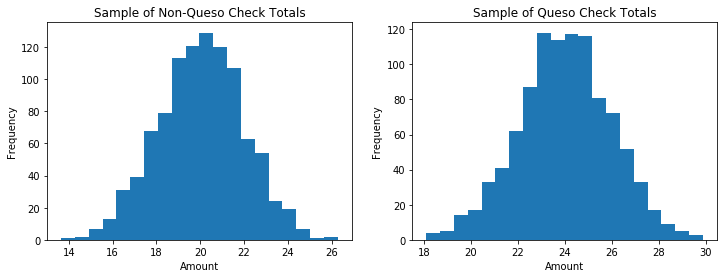

In [12]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

In [23]:
no_queso_df = pd.read_csv('data/no_queso.pkl', 'rb')

# need to convert histogram into df.summary to get n, standard deviation etc



/Users/sujata/Desktop/flatiron/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [31]:

no_queso


1000


array([20.76208262, 19.05591169, 23.60883165, 18.86548483, 20.1789019 ,
       23.99491885, 20.83968986, 21.4196737 , 23.18272129, 19.51304723,
       20.13113424, 19.33255256, 22.02801213, 18.29757387, 21.5205384 ,
       20.36246988, 15.36369287, 22.14506588, 20.74096877, 21.34613048,
       19.04649928, 21.19421907, 18.05346712, 19.2460241 , 20.89018538,
       20.32616936, 20.12840299, 22.5123332 , 21.12502229, 20.81840909,
       20.8493497 , 21.85997954, 20.70179038, 15.94821923, 18.71995485,
       19.45120616, 20.26613608, 19.60064071, 21.43618496, 21.06875426,
       19.09333362, 15.47326799, 15.71881468, 20.57883631, 19.3065353 ,
       17.8447982 , 17.64383574, 20.16732761, 22.20487025, 20.15068564,
       19.02025688, 19.16883799, 19.23658427, 22.04059674, 20.34058307,
       21.46508589, 24.52706282, 23.86234975, 18.10425805, 17.29910567,
       21.63024792, 19.12781092, 19.99376256, 19.19692644, 15.32107239,
       19.13340171, 20.62452759, 20.59388838, 21.27382898, 18.18

In [32]:
print(len(no_queso))

1000


### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [ ]:
"""
Written answer here

Ho: Mean revenues for Queso orders are the same as mean revenues for Not Queso orders
Ha: There is a statistically significant difference in mean revenue for Queso when compared to mean revenue for Not Queso orders
""""



### 2.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [ ]:
"""
Written answer here


Type 1 error would be reject the null hypothesis when it is true - 
that is we believe there is no difference in mean revenue between the two types of order when a difference actually exists.

Type 2 error would be fail to reject the null hypothesis when it is false - that is to say there is statistically significant difference in 
mean revenues between the two types of orders and we fail to accept the alternate hypothesis when its correct.

"""

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [26]:
# Code here 

x_bar1_non_queso = 20
x_bar2_queso = 24
non_queso_sigma = 6
queso_sigma = 6

# def sample_variance(sample):
#     sample_mean = np.mean(sample)
#     return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

def pooled_variance(queso, no_queso):
    n_1, n_2 = len(queso), len(no_queso)
    var_1, var_2 = sample_variance(queso), sample_variance(no_queso)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

# we need to do a two sample T-test here (two tailed with alpha 0.05/2)

def twosample_tstatistic(queso, no_queso):
      queso, no_queso = np.mean(queso), np.mean(no_queso)
      pool_var = pooled_variance(queso, no_queso)
      n_e, n_c = len(queso), len(no_queso)
      num = queso_mean - no_queso_mean
      denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
      return num / denom

t_stat = twosample_tstatistic(queso, no_queso)
t_stat

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
"""
Written answer here
"""

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a large, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

### 3.1) What is the probability of Thomas getting a small puppy?
Show your work, not just the final result

In [7]:
# Code here to find the probability


P_smallpup_pet_store = 0.6*0.2
P_smallpup_pound = 0.1*0.8

P_smallpup = P_smallpup_pet_store + P_smallpup_pound
P_smallpup

0.2

### 3.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
Show your work, not just the final result

In [11]:
# Code here to find the probability

p_large_puppy = 0.1*0.2 + 0.55*0.8
p_pet_store = 0.2
p_large_puppy_from_pet_store = 0.1*0.2

p_pet_store_given_large_puppy = (p_large_puppy_pet_store*p_pet_store)/p_large_puppy

p_pet_store_given_large_puppy 

0.008695652173913044

### 3.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
Show your work, not just the final result

In [ ]:
"""
Written answer here for which is more likely
"""
# He more likely went to the pet store 

### 3.4) For Question 3.2, what are the prior, posterior, and likelihood?

In [ ]:
"""
Written answer here for the prior 
Written answer here for the posterior
Written answer here for the likelihood
"""

# prior = p_pet_store and p_large_puppy

# posterior = p_pet_store_given_large_puppy

# likelihood = p_large_puppy_from_pet_store 

---
## Part 4: Linear Regression [Suggested Time: 10 min]
---

In this section, you'll be using the Advertising data, and you'll be creating linear models that are more complicated than a simple linear regression. The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [2]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

In the linear regression section of the curriculum, you analyzed how TV, Radio, and Newspaper spendings individually affected the Sales figures. Here, we'll use all three together in a multiple linear regression model!

### 4.1) Create a Correlation Matrix for `X`.

In [4]:
corr = data.corr() # Code here 
corr


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


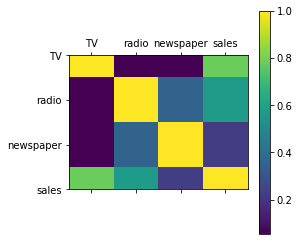

In [5]:
plt.matshow(data.corr())
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

### 4.2) Based on this correlation matrix only, would you recommend to use `TV`, `radio`, and `newspaper` in the same multiple linear regression model?

In [ ]:
"""
Written answer here
"""

# I would use TV and radio for sure as they show higher correlation with sales. Newspaper showing lower coorelation and may be considered in the 2nd interation of the model.

### 4.3) Use StatsModels' `ols`-function to create a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the model summary of this multiple regression model.

In [6]:
# Code here 
mlr_model= ols(formula='sales~TV+radio',data=data).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           4.83e-98
Time:                        09:43:59   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.4) Do we have any statistically significant coefficients? If the answer is yes, list them below.

In [ ]:
"""
Written answer here
"""
# The co-efficients for TV (0.0458) and radio (0.1880) are both significant. Every additional unit of sales is driven by 0.0458 unit change in TV. Similarly every unit change in sales sees a 0.1880 unit change in radio.
